In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import matplotlib.pyplot as plt

/kaggle/input/traffic-accidents/traffic_accidents.csv


Мы будем работать с информацией об авариях. Наша задача заключается в том, чтобы из имеющейся информации об аварии научиться определять наличие травмированных в аварии людей.

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('/kaggle/input/traffic-accidents/traffic_accidents.csv')
df

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,intersection_related_i,damage,prim_contributory_cause,num_units,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,Y,"$501 - $1,500",UNABLE TO DETERMINE,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,Y,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,Y,"$501 - $1,500",FOLLOWING TOO CLOSELY,3,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,Y,"OVER $1,500",UNABLE TO DETERMINE,2,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,Y,"$501 - $1,500",DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209301,09/13/2023 01:08:00 PM,UNKNOWN,UNKNOWN,UNKNOWN,TURNING,FOUR WAY,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,Y,"OVER $1,500",UNABLE TO DETERMINE,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,13,4,9
209302,07/18/2023 02:10:00 PM,UNKNOWN,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,Y,"OVER $1,500",IMPROPER OVERTAKING/PASSING,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,14,3,7
209303,10/23/2019 01:32:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,PEDESTRIAN,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT ON GRADE,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,N,$500 OR LESS,RELATED TO BUS STOP,2,INCAPACITATING INJURY,2.0,0.0,2.0,0.0,0.0,0.0,13,4,10
209304,06/01/2020 03:23:00 PM,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,Y,$500 OR LESS,"VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",2,NONINCAPACITATING INJURY,1.0,0.0,0.0,1.0,0.0,1.0,15,2,6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209306 entries, 0 to 209305
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_date                     209306 non-null  object 
 1   traffic_control_device         209306 non-null  object 
 2   weather_condition              209306 non-null  object 
 3   lighting_condition             209306 non-null  object 
 4   first_crash_type               209306 non-null  object 
 5   trafficway_type                209306 non-null  object 
 6   alignment                      209306 non-null  object 
 7   roadway_surface_cond           209306 non-null  object 
 8   road_defect                    209306 non-null  object 
 9   crash_type                     209306 non-null  object 
 10  intersection_related_i         209306 non-null  object 
 11  damage                         209306 non-null  object 
 12  prim_contributory_cause       

Шикарный датасет без отсутствующих значений

In [4]:
df.describe()

,num_units,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
count,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000
mean,2.063300,0.382717,0.001859,0.038102,0.221241,0.121516,2.244002,13.373047,4.144024,6.771822
std,0.396012,0.799720,0.047502,0.233964,0.614960,0.450865,1.241175,5.603830,1.966864,3.427593
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,9.000000,2.000000,4.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,14.000000,4.000000,7.000000
75%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,17.000000,6.000000,10.000000
max,11.000000,21.000000,3.000000,7.000000,21.000000,15.000000,49.000000,23.000000,7.000000,12.000000


<Axes: >

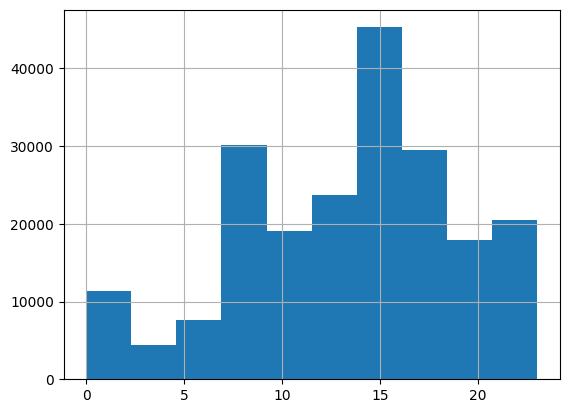

In [16]:
df['crash_hour'].hist()

<Axes: >

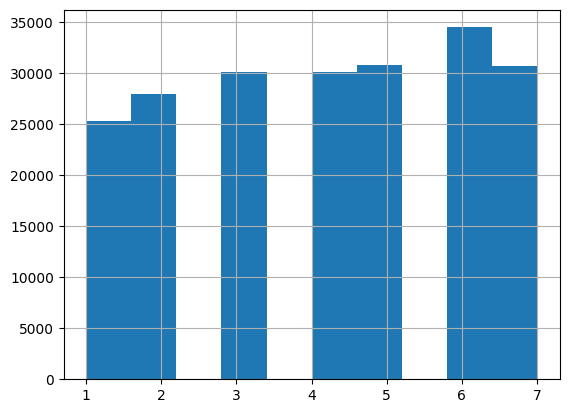

In [17]:
df['crash_day_of_week'].hist()

<Axes: >

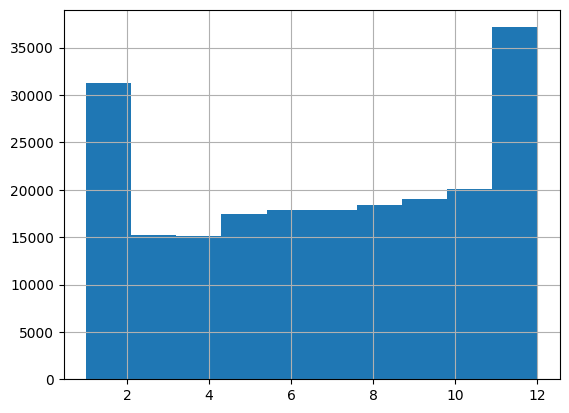

In [18]:
df['crash_month'].hist()

Здесь видим информацию о числовых значениях в датасете.
* **num_units** - Максимальное кол-во автомобилей в одной аварии - 11, но при этом в большинстве случаев в столкновения попадают 2 автомобиля.
* **injuries_...** - из информации о полученных травмах можно сделать вывод, что они происходят в небольшом количестве аварий, однако есть зарегистрированные случаи с большим количеством пострадавших.
* **crash_hour** - аварии происходят в течение всего дня, однако можно заметить, что во второй половине они случаются чаще, чем в первой
* **crash_day_of_week** - за весь рассматриваемый период аварии чаще всего случались по субботам, при этом разница в количестве зафиксированных аварий в субботу и понедельник составляет ~10_000 штук, что весьма много, но относительно общего количества разница между днями в количествах происходивших аварий небольшая.
* **crash_month** - можно отметить, что в зимние месяцы (в частности, декабрь и январь) было зафиксировано гораздо больше аварий, чем в остальное время (там +- равномерно, хотя заметна интересная тенденция к стабильному увеличению кол-ва аварий со второго-третьего месяца до конца года). К сожалений, в описании датасета не указано точное место наблюдений, но можно предположить, что где-то в умеренных широтах, где зимой выпадает снег, что приводит к резкому увеличению количества аварий.

Теперь посмотрим на столбцы с текстовыми значениями

In [4]:
text_columns = ['traffic_control_device', 'weather_condition', 'lighting_condition', 'first_crash_type', 'trafficway_type', 'alignment',
                'roadway_surface_cond', 'road_defect', 'crash_type', 'intersection_related_i', 'damage', 'prim_contributory_cause', 'most_severe_injury']

df[text_columns].describe()

,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,intersection_related_i,damage,prim_contributory_cause,most_severe_injury
count,209306,209306,209306,209306,209306,209306,209306,209306,209306,209306,209306,209306,209306
unique,19,12,6,18,20,6,7,7,2,2,3,40,5
top,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,Y,"OVER $1,500",UNABLE TO DETERMINE,NO INDICATION OF INJURY
freq,123944,164700,134109,64157,77753,204590,155905,171730,117376,199324,147313,58316,154789


Сразу видим большое количество уникальных значений в этих столбцах. По-хорошему, большую часть из них стоило бы закодировать в one-hot векторы, однако тогда вектора получатся очень разреженными, что не очень-то хорошо. Есть ощущение, что при обработке данных здесь надо будет закодировать эти переменные просто числами от 1 до n.

In [6]:
df['traffic_control_device'].value_counts()

traffic_control_device
TRAFFIC SIGNAL              123944
STOP SIGN/FLASHER            49139
NO CONTROLS                  29508
UNKNOWN                       4455
OTHER                          670
YIELD                          468
PEDESTRIAN CROSSING SIGN       247
OTHER REG. SIGN                181
LANE USE MARKING               153
FLASHING CONTROL SIGNAL        150
POLICE/FLAGMAN                 104
OTHER WARNING SIGN              95
RAILROAD CROSSING GATE          78
SCHOOL ZONE                     33
OTHER RAILROAD CROSSING         23
RR CROSSING SIGN                18
DELINEATORS                     17
NO PASSING                      12
BICYCLE CROSSING SIGN           11
Name: count, dtype: int64

Много значений, сильный дисбаланс в представленности. Кажется, можно было бы оставить 4 основных, а остальные смести в 'other', но это стоит проверить.

In [7]:
df['weather_condition'].value_counts()

weather_condition
CLEAR                       164700
RAIN                         21703
CLOUDY/OVERCAST               7533
SNOW                          6871
UNKNOWN                       6534
OTHER                          627
FREEZING RAIN/DRIZZLE          510
FOG/SMOKE/HAZE                 360
SLEET/HAIL                     308
BLOWING SNOW                   127
SEVERE CROSS WIND GATE          32
BLOWING SAND, SOIL, DIRT         1
Name: count, dtype: int64

С погодой похожая ситуация

In [8]:
df['lighting_condition'].value_counts()

lighting_condition
DAYLIGHT                  134109
DARKNESS, LIGHTED ROAD     53378
DARKNESS                    7436
DUSK                        6323
UNKNOWN                     4336
DAWN                        3724
Name: count, dtype: int64

no comments

In [9]:
df['first_crash_type'].value_counts()

first_crash_type
TURNING                         64157
ANGLE                           52250
REAR END                        42018
SIDESWIPE SAME DIRECTION        20116
PEDESTRIAN                       8996
PEDALCYCLIST                     5337
PARKED MOTOR VEHICLE             4893
FIXED OBJECT                     4742
SIDESWIPE OPPOSITE DIRECTION     1839
HEAD ON                          1790
REAR TO FRONT                    1157
REAR TO SIDE                      773
OTHER OBJECT                      759
OTHER NONCOLLISION                249
OVERTURNED                         96
ANIMAL                             77
REAR TO REAR                       49
TRAIN                               8
Name: count, dtype: int64

Много значений, но потенциально могут быть крайне полезны для нашей задачи

In [10]:
df['trafficway_type'].value_counts()

trafficway_type
NOT DIVIDED                        77753
FOUR WAY                           49057
DIVIDED - W/MEDIAN (NOT RAISED)    34221
ONE-WAY                            12341
DIVIDED - W/MEDIAN BARRIER         10720
T-INTERSECTION                      9233
OTHER                               4757
CENTER TURN LANE                    2862
UNKNOWN INTERSECTION TYPE           1885
FIVE POINT, OR MORE                 1119
UNKNOWN                             1060
Y-INTERSECTION                       958
TRAFFIC ROUTE                        776
ALLEY                                741
NOT REPORTED                         581
PARKING LOT                          448
RAMP                                 375
ROUNDABOUT                           149
DRIVEWAY                             143
L-INTERSECTION                       127
Name: count, dtype: int64

In [11]:
df['alignment'].value_counts()

alignment
STRAIGHT AND LEVEL       204590
STRAIGHT ON GRADE          2992
CURVE, LEVEL               1014
STRAIGHT ON HILLCREST       478
CURVE ON GRADE              179
CURVE ON HILLCREST           53
Name: count, dtype: int64

In [12]:
df['roadway_surface_cond'].value_counts()

roadway_surface_cond
DRY                155905
WET                 32908
UNKNOWN             12509
SNOW OR SLUSH        6203
ICE                  1303
OTHER                 438
SAND, MUD, DIRT        40
Name: count, dtype: int64

In [13]:
df['road_defect'].value_counts()

road_defect
NO DEFECTS           171730
UNKNOWN               34426
WORN SURFACE           1000
OTHER                   912
RUT, HOLES              741
SHOULDER DEFECT         358
DEBRIS ON ROADWAY       139
Name: count, dtype: int64

Очень подробная информация о состоянии дороги на момент аварии, это круто, но смущает большое разнообразие в данных и большой дисбаланс

In [14]:
df['crash_type'].value_counts()

crash_type
NO INJURY / DRIVE AWAY              117376
INJURY AND / OR TOW DUE TO CRASH     91930
Name: count, dtype: int64

In [15]:
df['intersection_related_i'].value_counts()

intersection_related_i
Y    199324
N      9982
Name: count, dtype: int64

Подавляющее большинство аварий произошло на перекрёстках, что, в прочем, неудивительно

In [16]:
df['damage'].value_counts()

damage
OVER $1,500      147313
$501 - $1,500     41210
$500 OR LESS      20783
Name: count, dtype: int64

Большинство аварий характеризуются большим денежным ущербом, что тоже интересно.

In [17]:
df['prim_contributory_cause'].value_counts()

prim_contributory_cause
UNABLE TO DETERMINE                                                                 58316
FAILING TO YIELD RIGHT-OF-WAY                                                       42914
FOLLOWING TOO CLOSELY                                                               19084
DISREGARDING TRAFFIC SIGNALS                                                        14591
IMPROPER TURNING/NO SIGNAL                                                          12643
FAILING TO REDUCE SPEED TO AVOID CRASH                                              10676
IMPROPER OVERTAKING/PASSING                                                          8302
DISREGARDING STOP SIGN                                                               6749
IMPROPER LANE USAGE                                                                  6462
NOT APPLICABLE                                                                       5241
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                         

Какой ужас... Особенно радует, что наибольший класс здесь - неопределённая причина. Круто.

In [18]:
df['most_severe_injury'].value_counts()

most_severe_injury
NO INDICATION OF INJURY     154789
NONINCAPACITATING INJURY     31527
REPORTED, NOT EVIDENT        16075
INCAPACITATING INJURY         6564
FATAL                          351
Name: count, dtype: int64

# Correlation

Исходя из поставленной задачи, нашей таргетной переменной будет 'crash_type'. Посмотрим на корреляции между данными.

## Categorical Variables

In [29]:
from scipy.stats import chi2_contingency
import seaborn as sns

In [7]:
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k-1, r-1))

In [9]:
categorical_vars = ['traffic_control_device', 'weather_condition', 'lighting_condition', 'first_crash_type', 'trafficway_type', 'alignment',
                   'roadway_surface_cond', 'road_defect', 'intersection_related_i', 'damage', 'prim_contributory_cause', 'most_severe_injury']

In [32]:
numeric_vars = ['injuries_total', 'injuries_fatal', 'num_units', 'injuries_incapacitating', 'injuries_non_incapacitating',
               'injuries_reported_not_evident', 'injuries_no_indication']

In [11]:
ordinal_vars = ['crash_hour', 'crash_day_of_week', 'crash_month']

In [15]:
for var in categorical_vars:
    print(' '.join(var.split('_')) + f'. Correlation value: {round(cramers_v(pd.crosstab(df[var], df["crash_type"]).values), 2)}')

traffic control device. Correlation value: 0.08
weather condition. Correlation value: 0.1
lighting condition. Correlation value: 0.12
first crash type. Correlation value: 0.39
trafficway type. Correlation value: 0.14
alignment. Correlation value: 0.02
roadway surface cond. Correlation value: 0.11
road defect. Correlation value: 0.07
intersection related i. Correlation value: 0.04
damage. Correlation value: 0.27
prim contributory cause. Correlation value: 0.32
most severe injury. Correlation value: 0.67


Ожидаемо, есть корреляция между тяжестью травм и их наличием. Среди остальных значений сильной корреляции с таргетом не обнаружено.

<Axes: >

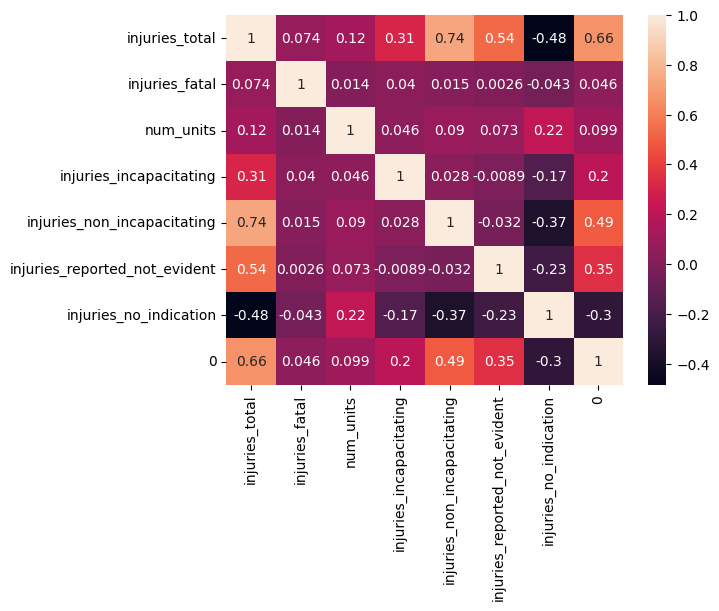

In [37]:
sns.heatmap(
    pd.concat([df[numeric_vars], pd.Series(pd.factorize(df['crash_type'])[0])], axis=1).corr('spearman'), annot=True
)

А вот тут интересно, что хоть вся информация связана с травмами, полученными при аварии, только у одной переменной заметна значимая корреляция с таргетной переменной.

<Axes: >

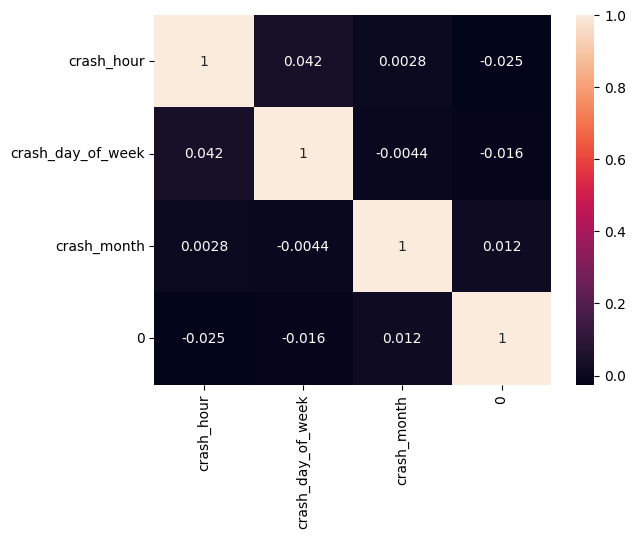

In [38]:
sns.heatmap(
    pd.concat([df[ordinal_vars], pd.Series(pd.factorize(df['crash_type'])[0])], axis=1).corr('kendall'), annot=True
)

Среди порядковых переменных корреляции с таргетом не обнаружено.

Хоть значимых корреляций с таргетом обнаружено было мало, даже среди переменных, отвечающих за тип полученных при авариях травм, мы сделаем допущение, что информация о пострадавших нам неизвестна, предположим, мы знаем только о факте произошедшей аварии и об условиях, в которой она произошла, и из этих данных мы хотим научиться определять, есть ли в аварии пострадавшие.

Какая информация нам может быть известна сразу?
* устройство контроля движения
* погодные условия
* условия освещённости
* тип столкновения
* состояние дороги и т.п.

Главным образом, нам неизвестна информация о причине столкновения, о причинённом ущербе в денежном эквиваленте, а также о полученных пострадавшими травмах. Удалим эту информацию и сохраним датасет.

И вообще, оформим отдельно общие данные об аварии, включая тип столкновения, кол-во задействованных транспортных средств и информацию о времени ДТП и отдельно данные о состоянии дороги и погодных условиях, why not?

In [11]:
df[['crash_date', 'first_crash_type', 'num_units', 'crash_hour', 'crash_day_of_week', 'crash_month', 'crash_type']].to_csv('accidents_info.csv')
df[['traffic_control_device', 'weather_condition', 'lighting_condition', 'trafficway_type', 'alignment', 'roadway_surface_cond', 'road_defect',
   'intersection_related_i']].to_csv('road_conditions.csv')

Зачем было искать корреляцию в данных, которые всё равно в конце были удалены? Не знаю, из интереса ¯\\_(ツ)_/¯